In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./google_review_ratings.csv')

# print(df.info())
nonNullIndexArr = np.where(df['Unnamed: 25'].notnull())[0] # nonNullIndexArr = [1347, 2712] (User 1348, 2713)

# Since the wrong data is not that much, so correct it manually
# User 1348: (1) Handle 'Category 23' 's value (.26)    (2) We guess that 'Category 24' 's value is what in 'Unnamed: 25' column
df.loc[nonNullIndexArr[0], 'Category 23'] = 1.03 # Guess as User 1347 & 1349
df.loc[nonNullIndexArr[0], 'Category 24'] = df.loc[nonNullIndexArr[0], 'Unnamed: 25'] # nonNullIndexArr[0] = 1347

# User 2713: (1) Handle 'Category 11' 's value (2\t2.)    (2) We guess that 'Category 12 ~ 24' 's value is what in ('Category 13 ~ 24' + 'Unnamed: 25') column
df.loc[nonNullIndexArr[1], 'Category 11'] = 0.85 # Guess as User 2712
for i in range(12, 25) :
    df.iloc[nonNullIndexArr[1], i] = df.iloc[nonNullIndexArr[1], i+1] # nonNullIndexArr[1] = 2712

df.drop(['Unnamed: 25'], axis=1, inplace=True)
df['Category 11'] = df['Category 11'].astype('float64') # Object to float64
# print(df.info())

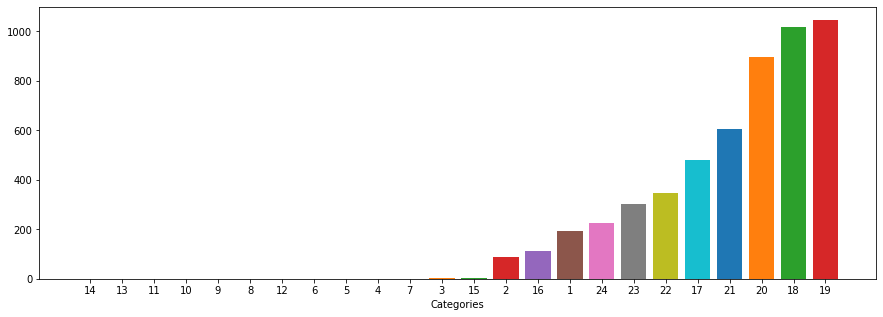

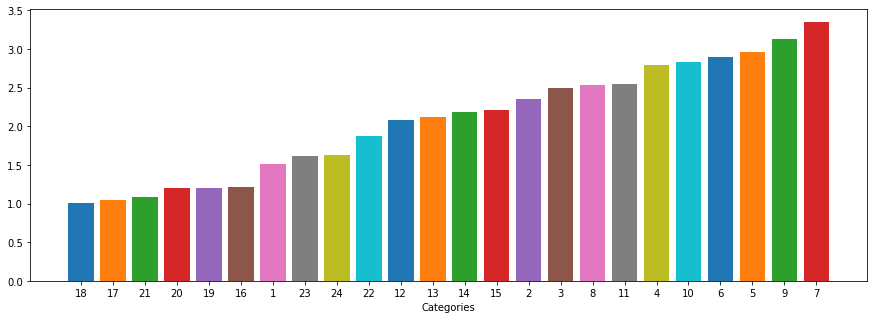

In [17]:
# Analyze the data

# Drop User column
dataSize = df['User'].size
df.drop(['User'], axis=1, inplace=True)

# Calculate # of 0 in each category, which means no rating by users
zeroRating = np.zeros((df.shape[1] + 1, 2), dtype=int)
fig = plt.figure(figsize=(15, 5))
for i in range(1, df.shape[1] + 1) : # df.shape[1] = number of columns
    categories = 'Category ' + str(i)
    zeroRating[i] = [i, len(np.where(df[categories] == 0)[0])]

zeroRating = zeroRating[zeroRating[:,1].argsort()]
for i in range(1, df.shape[1] + 1) :
    categories = str(zeroRating[:, 0][i]) # Must use string, or it will still be 1, 2, 3, ..., 24
    plt.bar(categories, zeroRating[:, 1][i])

plt.xlabel('Categories')
plt.show()

# 19 bakeries
# 18 gyms
# 20 beauty & spas
# 21 cafes
# 17 swimming pools
# 22 view points
# 23 monuments
# 24 gardens
# 1 churches
# 16 dance clubs
# 2 resorts
# 15 art galleries
# 3 beaches


# Mean rating ranking in each category (ignore 0, which means no rating by that user)
RateRanking = np.zeros((df.shape[1] + 1, 2))
fig = plt.figure(figsize=(15, 5))
temp = pd.DataFrame({})
for i in range(1, df.shape[1] + 1) :
    categories = 'Category ' + str(i)
    temp[categories] = df[categories]
    temp[categories] = temp[categories].replace(0, np.NaN)
    RateRanking[i] = [i, temp[categories].mean()]

RateRanking = RateRanking[RateRanking[:,1].argsort()]
for i in range(1, df.shape[1] + 1) :
    categories = str(int(RateRanking[:, 0][i])) # Must use string, or it will still be 1, 2, 3, ..., 24
    plt.bar(categories, RateRanking[:, 1][i])

plt.xlabel('Categories')
plt.show()

# 7 9 5 6 10 4 11 8 3 2 15 14 13 12 22 24 23 1 16 19 20 21 17 18
# malls
# restaurants
# theatres
# museums
# pubs/bars
# parks
# local services
# zoo
# beaches
# resorts
# art galleries
# juice bars
# hotels/other lodgings
# burger/pizza shops
# view points
# gardens
# monuments
# churches
# dance clubs
# bakeries
# beauty & spas
# cafes
# swimming pools
# gyms

{12: 108, 11: 144, 6: 149, 15: 185, 13: 269, 9: 287, 3: 294, 10: 318, 7: 351, 2: 389, 1: 395, 5: 460, 4: 489, 8: 520, 0: 543, 14: 555}
0   [ 57 130 199 200 204 205 206 207 208 209 210 211 212 213 214]
1   [761 766 767 769 771 772 773 776 777 779 782 783 784 785 786]
2   [132 133 273 275 339 355 356 357 358 359 360 361 362 363 364]
3   [116 118 119 327 329 330 331 332 333 334 335 336 337 338 340]
4   [112 113 120 121 122 123 124 125 126 127 128 129 144 157 175]
5   [59 60 74 75 76 78 79 80 81 82 83 84 85 86 87]
6   [647 648 650 651 652 653 654 655 656 657 658 659 660 661 662]
7   [669 670 671 672 673 674 675 676 677 678 679 680 681 682 683]
8   [ 1  2  3  4  5  6 11 12 13 14 15 16 17 18 19]
9   [252 255 256 257 258 259 260 261 262 263 264 265 266 267 268]
10   [807 808 809 810 811 812 813 814 815 816 817 818 819 820 821]
11   [392 393 399 406 415 423 629 634 644 645 734 735 736 737 738]
12   [748 749 750 751 752 753 754 755 756 757 758 759 760 762 763]
13   [134 135 136 137 138 139 140 

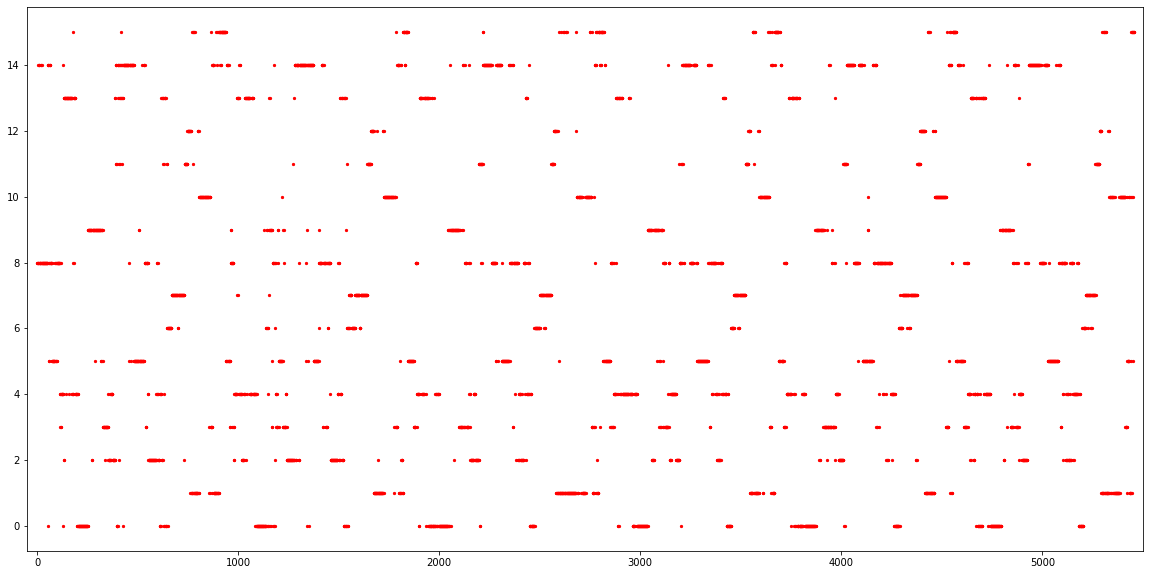

In [18]:
# Define a reasonable problem and predict the results
# Choose clustering as the problem
from sklearn.cluster import KMeans
cluster = 16
kmeans = KMeans(n_clusters=cluster, random_state=1386).fit(df)

labelResult = kmeans.labels_
unique, counts = np.unique(labelResult, return_counts=True)
# print(dict(zip(unique, counts)))
print({k: v for k, v in sorted(dict(zip(unique, counts)).items(), key=lambda item: item[1])})

fig = plt.figure(figsize=(20,10))
plt.xlim(-50, 5500)
for i in range(cluster) :
    labels = np.where(labelResult == i)[0]
    labels = labels + 1 # Convert to User number
    print(i, ' ', labels[0:15])
    y = np.full(labels.shape, i)
    plt.scatter(labels, y, s=5, color='red')

In [19]:
# Improvement

# food 10, 13, 15, 20, 22
# accommodation 3, 14
# humanities 2, 7, 16, 24
# nightclub 11, 17
# relax 6, 8, 12, 21
# nature 4, 5, 9, 23, 25
# sport 18, 19

new_df = pd.DataFrame({})
new_df['Food'] = df['Category 9'] + df['Category 12'] + df['Category 14'] + df['Category 19'] + df['Category 21']
new_df['Accommodation'] = df['Category 2'] + df['Category 13']
new_df['Humanities'] = df['Category 1'] + df['Category 6'] + df['Category 15'] + df['Category 23']
new_df['Nightclub'] = df['Category 10'] + df['Category 16']
new_df['Relax'] = df['Category 5'] + df['Category 7'] + df['Category 11'] + df['Category 20']
new_df['Nature'] = df['Category 3'] + df['Category 4'] + df['Category 8'] + df['Category 22'] + df['Category 24']
new_df['Sport'] = df['Category 17'] + df['Category 18']

print(new_df)

      Food  Accommodation  Humanities  Nightclub  Relax  Nature  Sport
0     6.24           1.70        4.66       3.23  11.70    9.63   0.50
1     6.24           1.70        4.66       3.24  11.70    9.92   0.50
2     6.24           1.70        4.66       3.23  11.70    9.90   0.50
3     6.24           2.20        4.66       3.23  11.73    9.61   0.50
4     6.24           1.70        4.66       3.23  11.70    9.90   0.50
...    ...            ...         ...        ...    ...     ...    ...
5451  5.86           6.29       13.48       1.70  11.22   14.44   1.31
5452  6.72           6.27        9.39       1.67   7.18   13.97   1.29
5453  5.81           6.08        9.38       1.65  10.52   13.99   1.27
5454  5.78           5.11       13.39       1.62  10.52   14.01   1.27
5455  5.77           5.08        9.37       1.60  11.17   15.01   1.25

[5456 rows x 7 columns]


{0: 203, 15: 211, 12: 238, 5: 262, 8: 338, 10: 338, 1: 343, 6: 355, 7: 360, 9: 363, 11: 363, 2: 368, 4: 370, 14: 379, 13: 418, 3: 547}
0   [122 126 144 645 646 647 648 649 650 651 652 653 654 655 656]
1   [160 161 163 164 166 167 168 169 170 171 172 173 174 183 184]
2   [17 18 19 20 21 22 23 24 26 28 35 37 38 39 40]
3   [  2   3   5   6  11  12  13  14  15  16  73  89 175 176 177]
4   [  7   8   9  10 117 145 146 147 148 150 151 153 154 157 242]
5   [644 741 743 744 745 746 747 748 749 750 751 752 753 754 755]
6   [ 52 124 127 353 355 358 365 375 376 377 378 380 383 384 464]
7   [ 42  43  44  45  48  57  61  74  90  92  93  98 101 116 179]
8   [125 129 130 134 135 136 137 138 139 140 141 142 143 149 152]
9   [53 54 55 56 58 63 64 66 75 76 78 79 80 81 82]
10   [123 260 262 264 266 267 268 269 270 271 272 273 274 276 277]
11   [118 119 120 121 131 254 255 256 257 258 259 261 263 265 280]
12   [132 133 370 373 374 600 602 669 670 671 672 673 674 675 676]
13   [ 1  4 25 27 29 30 31 32 33 3

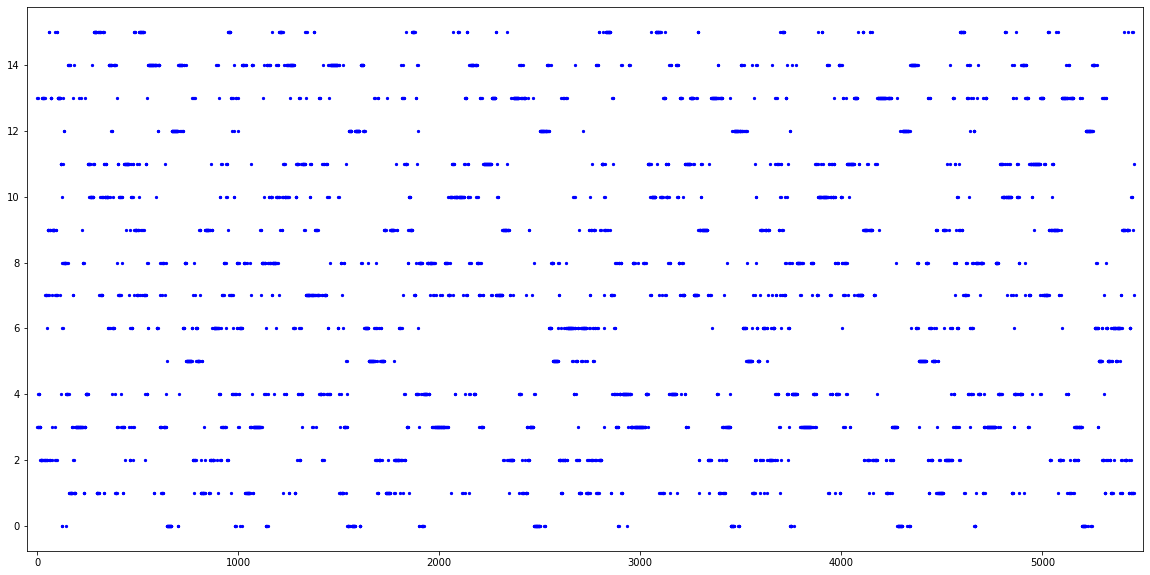

In [20]:
kmeans = KMeans(n_clusters=cluster, random_state=1386).fit(new_df)

labelResult = kmeans.labels_
unique, counts = np.unique(labelResult, return_counts=True)
# print(dict(zip(unique, counts)))
print({k: v for k, v in sorted(dict(zip(unique, counts)).items(), key=lambda item: item[1])})

fig = plt.figure(figsize=(20,10))
plt.xlim(-50, 5500)
for i in range(cluster) :
    labels = np.where(labelResult == i)[0]
    labels = labels + 1 # Convert to User number
    print(i, ' ', labels[0:15])
    y = np.full(labels.shape, i)
    plt.scatter(labels, y, s=5, color='blue')

# {12: 108, 11: 144, 6: 149, 15: 185, 13: 269, 9: 287, 3: 294, 10: 318, 7: 351, 2: 389, 1: 395, 5: 460, 4: 489, 8: 520, 0: 543, 14: 555}